In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import exp, abs, log
from scipy.special import gamma, factorial
import os
import scipy.stats as stats
import statsmodels.api as sm
from utils import *
import time
import datetime as dt
import universal as up
from universal import tools, algos
from universal.algos import *
from strategies import *
from metrics import *

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
np.set_printoptions(threshold=np.inf)

In [2]:
def run(paras, strategy_lst, metrics_lst, figsize=(10,5), phase_cnt=12):
    maxiter, subn, lb, c = paras['maxiter'], paras['subn'], paras['lb'], paras['c']

    results = []
    concat_result_dict = {}
    for phs in range(0, phase_cnt):
        print('Phase %d' % phs)
        if paras['dataset']=='snp500-12':
            data_path1 = './stock_data/stock_phase%02d_lb%d.npz' % (phs, lb)
        elif paras['dataset']=='snp500-24':
            data_path1 = './stock_data/stock24_phase%02d_lb%d.npz' % (phs, lb)
        data = np.load(data_path1)
        cov_train, choice = data['cov_train'], data['choice']
        cov = cov_train[choice[:subn], :][:, choice[:subn]]

        print('Testing...')
        predY0, std_varY0, sample_Y0 = get_res(paras, phs, maxiter, subn, lb)
        
#         strategy_lst = ['ucb_strategy(0, predY0, std_varY0, sample_Y0)', 
#                         'opt_strategy(predY0, std_var_Y0, sample_Y0, cov, paras["opt_delta"])', 
#                         'passive_strategy(predY0, std_var_Y0, sample_Y0, cov, paras["passive_eps"], paras["passive_delta"])']
#         metrics_lst =['cumulative_return(rt_v)', 'daily_return(rt_v)', 'max_redraw(rt_v)']
        
        result_dict = {}        
        for strategy in strategy_lst:
            strategy_name = strategy.split('(')[0]
            print(strategy_name)
            rt_v, x_vec = eval(strategy)
            result_dict[strategy_name] = [rt_v, x_vec]
            if strategy_name in concat_result_dict:
                concat_result_dict[strategy_name][0] += rt_v
                concat_result_dict[strategy_name][1] += x_vec
            else:
                concat_result_dict[strategy_name] = [rt_v, x_vec]
            for metric in metrics_lst:
                metric_name = metric.split('(')[0]     
                res = eval(metric)
                print('\t%s: %.8f' % (metric_name, res))
        results.append(result_dict)
                
    print()
    print('===========================overall results===========================')
    for strategy in strategy_lst:
        strategy_name = strategy.split('(')[0]
        print(strategy_name)
        rt_v, x_vec = concat_result_dict[strategy_name]
        for metric in metrics_lst:
            metric_name = metric.split('(')[0]     
            res = eval(metric)
            print('\t%s: %.8f' % (metric_name, res))

    return results, concat_result_dict

In [ ]:
strategy_lst = ['ucb_strategy(0, predY0, std_varY0, sample_Y0)', 
                'opt_strategy(predY0, std_varY0, sample_Y0, cov, paras["opt_gamma"])', 
                'passive_strategy(predY0, std_varY0, sample_Y0, cov, paras["passive_eps"], paras["passive_delta"])'
               ]
metrics_lst =['cumulative_return(rt_v)', 'daily_return(rt_v)', 
              'cumulative_return_fee(rt_v, x_vec, paras["c"])', 'daily_return_fee(rt_v, x_vec, paras["c"])', 
              'max_redraw(rt_v)', 'sharpe_ratio(rt_v, paras["rf"])', 'volatility(rt_v)', 'turnover(rt_v)']

# 12 phases

## HATS mat 30 + GGD

    #!/bin/bash

    maxiter=5000
    subn=100
    lb=5
    M=20
    inverse='True'
    ggd='True'
    matid='48 35 83 25 84 19 21 71 24 68 81 38 51 56 77 43 80 15 30 60 69 37 73 62 34 54 57 70 39 42'

    matcnt=$(echo ${matid} | wc -w)
    for i in `seq 0 11`;
    # for i in 10;
    do
        echo "phase $i"
            python main2.py --phase $i --maxiter ${maxiter} --subn ${subn} --lb ${lb} --inverse ${inverse} --matid ${matid} --M ${M} --ggd ${ggd} --gpu 1  > ./log/main2_noval_inv${inverse}_ggd${ggd}_M${M}_iter${maxiter}_mat${matcnt}_subn${subn}_lb5_s5_log${i}.log
    done

Phase 0
Testing...
./tmp2/snp500-12_phase00_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.16094762
	daily_return: 1.00149348
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.07128732
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.09505884
	daily_return: 1.00090849
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.07672599
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 1.10996665
	daily_return: 1.00104384
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.05127578
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 1
Testing...
./tmp2/snp500-12_phase01_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.05800692
	daily_return: 1.00056403
	cumulative_return_fee: 0.00000000
	d

	cumulative_return: 1.03082052
	daily_return: 1.00030360
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.12779549
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 0.84413335
	daily_return: 0.99830699
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.08821339
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 11
Testing...
./tmp2/snp500-12_phase11_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.30887608
	daily_return: 1.00269531
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.10327881
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.40535317
	daily_return: 1.00340868
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.12233817
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnove

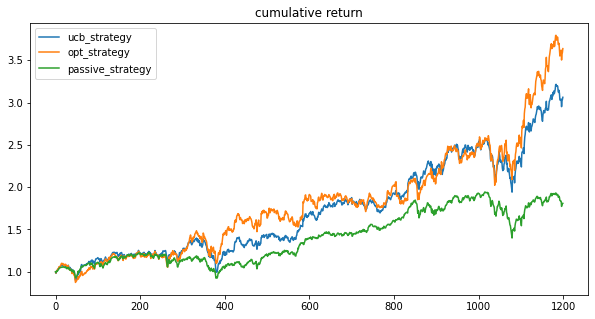

In [4]:
paras={'dataset':'snp500-12', 'maxiter':5000, 'subn':100, 'lb':5, 'M':20, 'inverse':'True', 'ggd':'True', 'matcnt':30, 
       'c':0.001, 'rf':1e-3, 'opt_gamma':3, 'passive_eps':1.001, 'passive_delta':0.01}

results, concat_results = run(paras, strategy_lst, metrics_lst, phase_cnt=12)
plot_cumulative_return_history(concat_results, strategy_lst, figsize=(10,5))

## HATS mat 0 + GGD

    #!/bin/bash

    maxiter=5000
    subn=100
    lb=5
    M=20
    inverse='True'
    ggd='True'
    matid=''

    matcnt=$(echo ${matid} | wc -w)
    for i in `seq 0 11`;
    # for i in 10;
    do
        echo "phase $i"
            python main2.py --phase $i --maxiter ${maxiter} --subn ${subn} --lb ${lb} --inverse ${inverse} --matid ${matid} --M ${M} --ggd ${ggd} --gpu 1  > ./log/main2_noval_inv${inverse}_ggd${ggd}_M${M}_iter${maxiter}_mat${matcnt}_subn${subn}_lb5_s5_log${i}.log
    done

Phase 0
Testing...
./tmp2/snp500-12_phase00_iter5000_subn100_lb5_M20_matcnt0_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.11921097
	daily_return: 1.00112687
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.06961980
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.02838072
	daily_return: 1.00027989
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.07290357
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 1.11211234
	daily_return: 1.00106318
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.05116448
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 1
Testing...
./tmp2/snp500-12_phase01_iter5000_subn100_lb5_M20_matcnt0_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.08739338
	daily_return: 1.00083819
	cumulative_return_fee: 0.00000000
	dai

	cumulative_return: 1.08785116
	daily_return: 1.00084240
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.12689241
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 0.84134124
	daily_return: 0.99827391
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.08852750
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 11
Testing...
./tmp2/snp500-12_phase11_iter5000_subn100_lb5_M20_matcnt0_invTrue_ggdTrue.npz
ucb_strategy
	cumulative_return: 1.31385962
	daily_return: 1.00273342
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.10327881
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.37150866
	daily_return: 1.00316411
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.12151102
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover

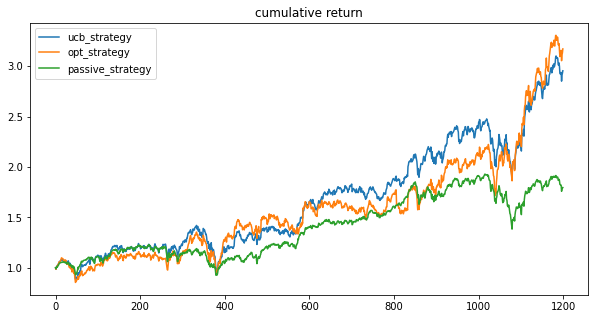

In [5]:
paras={'dataset':'snp500-12', 'maxiter':5000, 'subn':100, 'lb':5, 'M':20, 'inverse':'True', 'ggd':'True', 'matcnt':0, 
       'c':0.001, 'rf':1e-3, 'opt_gamma':3, 'passive_eps':1.001, 'passive_delta':0.01}

results, concat_results = run(paras, strategy_lst, metrics_lst, phase_cnt=12)
plot_cumulative_return_history(concat_results, strategy_lst, figsize=(10,5))

## HATS mat 30 + No GGD

    #!/bin/bash

    maxiter=5000
    subn=100
    lb=5
    M=20
    inverse='True'
    ggd='False'
    matid='48 35 83 25 84 19 21 71 24 68 81 38 51 56 77 43 80 15 30 60 69 37 73 62 34 54 57 70 39 42'

    matcnt=$(echo ${matid} | wc -w)
    for i in `seq 0 11`;
    # for i in 10;
    do
        echo "phase $i"
                python main2.py --phase $i --maxiter ${maxiter} --subn ${subn} --lb ${lb} --inverse ${inverse} --matid ${matid} --M ${M} --ggd ${ggd} --gpu 1  > ./log/main2_noval_inv${inverse}_ggd${ggd}_M${M}_iter${maxiter}_mat${matcnt}_subn${subn}_lb5_s5_log${i}.log
    done

Phase 0
Testing...
./tmp2/snp500-12_phase00_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdFalse.npz
ucb_strategy
	cumulative_return: 1.00902509
	daily_return: 1.00008985
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.06036860
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.00395705
	daily_return: 1.00003949
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.09755714
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 1.12901905
	daily_return: 1.00121423
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.05015231
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 1
Testing...
./tmp2/snp500-12_phase01_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdFalse.npz
ucb_strategy
	cumulative_return: 1.08549202
	daily_return: 1.00082067
	cumulative_return_fee: 0.00000000


/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


	cumulative_return: 1.17272989
	daily_return: 1.00159461
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.07537788
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
Phase 5
Testing...
./tmp2/snp500-12_phase05_iter5000_subn100_lb5_M20_matcnt30_invTrue_ggdFalse.npz
ucb_strategy
	cumulative_return: 1.03137761
	daily_return: 1.00030900
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.05907155
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
opt_strategy
	cumulative_return: 1.06408967
	daily_return: 1.00062139
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.07228599
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000
passive_strategy
	cumulative_return: 1.20675519
	daily_return: 1.00188112
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.06952113
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnove

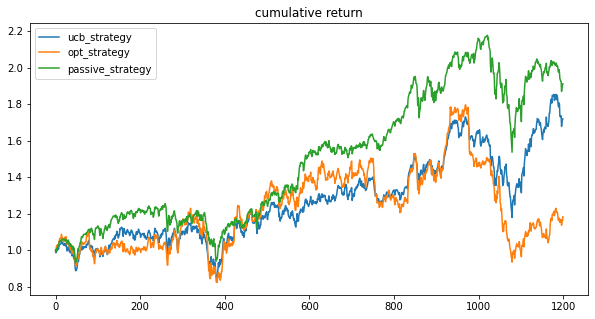

In [6]:
paras={'dataset':'snp500-12', 'maxiter':5000, 'subn':100, 'lb':5, 'M':20, 'inverse':'True', 'ggd':'False', 'matcnt':30, 
       'c':0.001, 'rf':1e-3, 'opt_gamma':3, 'passive_eps':1.001, 'passive_delta':0.01}

results, concat_results = run(paras, strategy_lst, metrics_lst, phase_cnt=12)
plot_cumulative_return_history(concat_results, strategy_lst, figsize=(10,5))